# Progetto Text Mining
<p> <strong>Obiettivo n° 1 </strong>: Scaricare i sommari di tutti gli episodi della prima stagione della serie Dr. House <strong>(preferibilmente in Inglese)</strong>. </p>
<p> <strong>Obiettivo n° 2 </strong>: L’obiettivo è analizzare la similarità di argomenti tra tutti gli episodi <strong>(presi a coppie)</strong> considerando i vettori di embedding delle parole del sommario di ogni
episodio <strong>(avendo preliminarmente eliminato le stopwords)</strong>. Per il calcolo della similarità utilizzare la similarità a coseno.</p>

<h1> Informazioni su Dr.House </h1>
<img src="https://m.media-amazon.com/images/S/pv-target-images/be3702154af5eddf9f24dfda71846636c20fd8b3e6b3543342e69f7087863710.jpg" alt="Descrizione alternativa dell'immagine" width="500" height="300">
<p> Dr. House - Medical Division (House, M.D.) è una serie televisiva statunitense ideata da David Shore e Paul Attanasio e prodotta dal 2004 al 2012; l'emittente televisiva ha ufficialmente accreditato Shore come creatore. </p>
<p>La serie è incentrata attorno al ruolo del dottor Gregory House, un medico poco convenzionale ma dotato di grandi capacità ed esperienza, a capo di una squadra di medicina diagnostica presso il fittizio ospedale universitario Princeton-Plainsboro Teaching Hospital, nel New Jersey.</p>
<p>La serie trae ispirazione dai gialli del celebre detective Sherlock Holmes: in ogni episodio ha luogo un giallo diverso che il protagonista, attraverso le proprie capacità mediche e deduttive, deve districare basandosi su vari indizi, spesso poco evidenti; infine, egli riesce quasi sempre a risolvere il puzzle medico e a salvare il paziente.</p>
<p>I misteri medici sono invece stati ispirati da una rubrica del New York Times dedicata ai casi clinici particolarmente problematici. </p>
<p>Dr. House è stato acclamato dalla critica e ha un alto livello di ascolto televisivo. La serie è stata tra i primi dieci programmi televisivi più seguiti negli Stati Uniti dalla sua seconda stagione alla quarta; nella stagione televisiva 2008-2009, è scesa complessivamente sino al diciannovesimo posto. </p>
<p>Distribuito in 66 paesi, Dr. House è stato il programma televisivo più seguito al mondo nel 2008. La serie ha ricevuto diversi premi, incluso un Peabody Award, due Golden Globe e tre Emmy Award. </p>

<h1> House 1° Season </h1>
<p>La prima stagione della serie televisiva House è stata trasmessa per la prima volta il 16 novembre 2004 e si è conclusa il 24 maggio 2005. </p>
<p>La stagione segue il dottor Gregory House e la sua squadra mentre risolvono un caso medico in ogni episodio. La sottotrama della stagione ruota attorno al miliardario Edward Vogler che fa una donazione di 100 milioni di dollari all'ospedale. Grazie a questa donazione, Vogler diventa il nuovo presidente del consiglio di amministrazione e ordina a House di licenziare uno dei membri della sua squadra. Vogler lo fa per dimostrare a House che può controllarlo: "Ho bisogno di sapere che qualsiasi cosa ti chieda di fare, per quanto sgradevole tu la trovi, la farai".</p>
<p>Chi McBride si è unito al cast nel ruolo di Vogler in cinque episodi della stagione. Il suo personaggio è stato introdotto dopo che il presidente degli Universal Studios Jeff Zucker ha minacciato che la stagione sarebbe stata accorciata di sei episodi se non fosse stato aggiunto un personaggio "boss". Mentre c'erano possibilità che il personaggio tornasse, era generalmente antipatico agli spettatori e ai critici e quindi non riportato nello show. </p>
<p>Sela Ward, che sarebbe tornata come personaggio ricorrente principale della seconda stagione, è apparsa negli ultimi due episodi nei panni di Stacy Warner, l'ex fidanzata di House. </p>

<h1> <strong>Obiettivo n° 1 </strong> </h1>
<p>Scaricare i sommari di tutti gli episodi della prima stagione della serie Dr. House <strong>(preferibilmente in Inglese)</strong>. </p>

<p> Per la creazione del dataset contenente i sommari di tutti gli episodi, ho deciso di effettuare il web scraping dal seguente sito     <a href="https://en.wikipedia.org/wiki/House_season_1" target="_blank">Dr.House Season 1</a></p>
<p>Lo scopo principale è quello di estrarre informazioni dettagliate sugli episodi, come numero dell'epiosdio, titolo, direttore, sceneggiatore, data di messa in onda originale, numero di telespettatori in milioni, trama e diagnosi finale (solo per quest'ultima informazione ho deciso di iserirlo manualmente a causa di un errore di scraping web), e organizzare il tutto in un DataFrame per una facile manipolazione e analisi.</p>

Importazione delle librerie
requests: Permette di inviare richieste HTTP in Python. Viene usata per recuperare il contenuto della pagina web da analizzare.
BeautifulSoup (da bs4): Utilizzata per analizzare il contenuto HTML recuperato e facilitare l'estrazione dei dati.
pandas: Libreria per la manipolazione e l'analisi dei dati. Viene utilizzata per organizzare i dati estratti in un DataFrame, che offre varie funzionalità per l'elaborazione dei dati.
Definizione della funzione scrape_house_episodes
Questa funzione accetta come input un url della pagina Wikipedia da cui estrarre le informazioni sugli episodi. Il processo può essere suddiviso nei seguenti passaggi:

Richiesta della pagina web: Utilizza requests.get(url) per ottenere il contenuto della pagina. Verifica lo status code della risposta per assicurarsi che la richiesta sia stata eseguita con successo (status code 200).
Analisi del contenuto HTML: Il contenuto della risposta viene analizzato con BeautifulSoup per facilitare l'estrazione dei dati.
Estrazione dei dati degli episodi: Utilizza metodi di BeautifulSoup per trovare tutte le righe che rappresentano gli episodi nella tabella. Per ogni riga, estrae dettagli come il numero dell'episodio, il titolo, chi l'ha diretto, chi l'ha scritto, la data di messa in onda originale e l'audience negli USA.
Estrazione della trama e della diagnosi finale: Per ogni episodio, cerca una riga aggiuntiva (expand-child) che contiene la trama e la diagnosi finale, se presenti, e le aggiunge ai dettagli dell'episodio.
Ritorno dei dati: Compila un elenco di dizionari, ognuno rappresentante un episodio, e restituisce questo elenco al termine dell'elaborazione.
Creazione di un DataFrame con i dati degli episodi

In [1]:
import requests  # Importo la libreria requests per effettuare richieste HTTP.
from bs4 import BeautifulSoup  # Importo BeautifulSoup da bs4 per analizzare documenti HTML.
import pandas as pd  # Importo pandas per la manipolazione e l'analisi dei dati.
import numpy as np  # Importo numpy, utile per gestire operazioni numeriche.

def scrape_house_episodes(url):  # Definisco una funzione per estrarre gli episodi della serie House da Wikipedia.
    episodes = []  # Inizializzo una lista vuota dove memorizzerò i dettagli di ciascun episodio.
    response = requests.get(url)  # Effettuo una richiesta HTTP GET all'URL fornito.
    if response.status_code == 200:  # Controllo se la richiesta HTTP è stata un successo (codice 200).
        soup = BeautifulSoup(response.content, 'html.parser')  # Analizzo il contenuto HTML della risposta.
        # Trovo tutte le righe della tabella degli episodi, identificate dalla classe CSS 'vevent'.
        episode_rows = soup.find_all('tr', 'vevent')
        
        for episode_row in episode_rows:  # Itero su ciascuna riga trovata.
            # Raccolgo i dettagli di ogni episodio in un dizionario.
            episode_details = {
                'episode_number': episode_row.find('th', id=True).get_text(strip=True),  # Estraggo il numero dell'episodio.
                'title': episode_row.find('td', 'summary').get_text(strip=True),  # Estraggo il titolo dell'episodio.
                'directed_by': episode_row.find_all('td')[2].get_text(strip=True),  # Estraggo il nome del regista.
                'written_by': episode_row.find_all('td')[3].get_text(strip=True),  # Estraggo il nome dello sceneggiatore.
                'original_air_date': episode_row.find_all('td')[4].get_text(strip=True),  # Estraggo la data di messa in onda originale.
                'us_viewers': episode_row.find_all('td')[5].get_text(strip=True).split('[')[0]  # Estraggo gli ascolti USA, rimuovendo eventuali riferimenti.
            }
            
            # Cerco una riga aggiuntiva che contiene una descrizione estesa dell'episodio.
            expand_row = episode_row.find_next_sibling('tr', 'expand-child')
            if expand_row:  # Se esiste una riga con descrizione estesa,
                # Raccolgo il testo della trama dall'insieme di paragrafi trovati.
                plot_paragraphs = expand_row.find('td', 'description').find_all('p')
                plot_text = ' '.join(paragraph.get_text(strip=True) for paragraph in plot_paragraphs)
                episode_details['plot'] = plot_text  # Assegno la trama al dizionario.
                
                # Estraggo la diagnosi finale dell'episodio e la assegno, se presente.
                final_diagnosis = expand_row.find('i').find_next_sibling(text=True).strip()
                episode_details['final_diagnosis'] = final_diagnosis if final_diagnosis else 'N/A'
            
            episodes.append(episode_details)  # Aggiungo i dettagli dell'episodio alla lista degli episodi.
        
        return episodes  # Restituisco la lista completa degli episodi.
    else:  # Se la richiesta non è andata a buon fine,
        print(f'Errore: impossibile recuperare la pagina ({response.status_code}).')  # Stampo un messaggio di errore.
        return []  # Restituisco una lista vuota.

# Definisco l'URL della pagina Wikipedia della stagione 1 di House.
url = 'https://en.wikipedia.org/wiki/House_(season_1)'
house_episodes = scrape_house_episodes(url)  # Chiamo la funzione definita passando l'URL.

# Converto la lista di dizionari ottenuta in un DataFrame di pandas per facilitare l'analisi e la visualizzazione.
house_episodes_df = pd.DataFrame(house_episodes)

# Visualizzo le prime righe del DataFrame per un'anteprima.
house_episodes_df.head()


,episode_number,title,directed_by,written_by,original_air_date,us_viewers,plot,final_diagnosis
0,1,"""Pilot""""Everybody Lies""",Bryan Singer,David Shore,"November 16, 2004(2004-11-16)",7.05,"Rebecca Adler (Robin Tunney), a 29-year-old ki...",N/A
1,2,"""Paternity""",Peter O'Fallon,Lawrence Kaplow,"November 23, 2004(2004-11-23)",6.09,"A 16-year-old high school student, Dan (Scott ...",N/A
2,3,"""Occam's Razor""",Bryan Singer,David Shore,"November 30, 2004(2004-11-30)",6.33,A college student named Brandon (Kevin Zegers)...,N/A
3,4,"""Maternity""",Newton Thomas Sigel,Peter Blake,"December 7, 2004(2004-12-07)",6.74,After overhearing a conversation about a sick ...,N/A
4,5,"""Damned If You Do""",Greg Yaitanes,Sara B. Cooper,"December 14, 2004(2004-12-14)",6.91,Sister Augustine (Elizabeth Mitchell) arrives ...,N/A


<h1> <strong>Obiettivo n° 2 </strong> </h1>
<p>L’obiettivo è analizzare la similarità di argomenti tra tutti gli episodi <strong>(presi a coppie)</strong> considerando i vettori di embedding delle parole del sommario di ogni episodio <strong>(avendo preliminarmente eliminato le stopwords)</strong>. Per il calcolo della similarità utilizzare la similarità a coseno.</p>

<p> Prima di procedere con il secondo obiettivo, vado a fare una pulizia de dataset che comprende la conversione di alcune variabili, un analisi descrittiva dei dati. </p>

# Pulizia Dataset

In [3]:
import nltk  # Importo la libreria NLTK, che è uno strumento essenziale per lavorare con il linguaggio naturale.
from nltk.stem import WordNetLemmatizer  # Importo WordNetLemmatizer per ridurre le parole alle loro forme base.
from nltk.corpus import wordnet  # Importo wordnet, un grande database lessicale di inglese.
from nltk.corpus import stopwords  # Importo stopwords per filtrare parole come 'the', 'is', 'in', ecc.
from nltk.tokenize import word_tokenize, sent_tokenize  # Importo funzioni per suddividere il testo in parole o frasi.
import string  # Importo il modulo string per accedere a costanti e operazioni con stringhe.

# Assicurati di avere scaricato i pacchetti necessari per NLTK. Questi download sono necessari per utilizzare le funzionalità di NLTK.
nltk.download('wordnet')  # Scarico 'wordnet', un database lessicale che aiuta il lemmatizer a funzionare.
nltk.download('omw-1.4')  # Scarico 'omw-1.4', il Wordnet multilingue, che supporta diverse lingue oltre all'inglese.
nltk.download('punkt_tab')  # Scarico 'punkt_tab', un tokenizer di frasi e parole pre-addestrato.
nltk.download('stopwords')  # Scarico 'stopwords', una lista di parole comuni che di solito sono filtrate in analisi del testo.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\miane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\miane\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\miane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# StopWords

In [4]:
stop_words = set(stopwords.words('english'))  # Creo un insieme di stopwords inglesi. Le stopwords sono parole comuni che non aggiungono significato significativo al testo.

def remove_stop_words(sentence):  # Definisco una funzione che rimuove le stopwords da una frase data.
    words = sentence.split()  # Divido la frase in parole usando il metodo split, che di default suddivide il testo sugli spazi.

    # Creo una lista di parole filtrate, includendo solo quelle parole che non sono stopwords.
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    return ' '.join(filtered_words)  # Unisco le parole filtrate in una stringa unica e la restituisco.


# Tokenizzazione

In [5]:
def tokenize_and_remove_stopwords(text):  # Definisco una funzione per tokenizzare un testo e rimuovere le stopwords.
    tokens = word_tokenize(text)  # Utilizzo la funzione word_tokenize per suddividere il testo in token (parole e punteggiatura).

    # Creo una lista di token filtrati, escludendo quelli che sono stopwords.
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
    return filtered_tokens  # Restituisco la lista di token filtrati.

# Rimozione Punteggiatura e Normalizzazione

In [6]:
def remove_punctuation(words):
    translator = str.maketrans('', '', string.punctuation)  # Creo un traduttore per rimuovere la punteggiatura.
    stripped = [word.translate(translator) for word in words]  # Applico il traduttore a ogni parola per rimuovere la punteggiatura.
    return stripped  # Restituisco la lista di parole senza punteggiatura.

def tokenize_normalize(text):
    tokens = word_tokenize(text)  # Tokenizzo il testo in parole e simboli di punteggiatura.
    lower_tokens = [token.lower() for token in tokens]  # Converto tutti i token in minuscolo per normalizzare il testo.

    no_punctuation_tokens = remove_punctuation(lower_tokens)  # Rimuovo la punteggiatura dai token normalizzati.
    # Filtro i token rimuovendo le stopwords e i token vuoti.
    filtered_tokens = [token for token in no_punctuation_tokens if token not in stop_words and token != '']

    lemmatizer = WordNetLemmatizer()  # Inizializzo un lemmatizzatore per ridurre i token alle loro forme base.
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]  # Applico il lemmatizzatore ai token filtrati.

    return lemmatized_tokens  # Restituisco i token lemmatizzati.

# Lemmatizzazione

In [7]:
import nltk  # Importo la libreria NLTK, utilizzata per l'elaborazione del linguaggio naturale.
nltk.download('averaged_perceptron_tagger')  # Scarico il tagger 'averaged_perceptron_tagger' da NLTK.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\miane\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
from nltk.tokenize import word_tokenize  # Importo la funzione per tokenizzare il testo in parole.
from nltk.corpus import stopwords  # Importo il modulo per gestire le parole comuni che di solito vengono filtrate.
from nltk.stem import WordNetLemmatizer  # Importo il lemmatizzatore per ridurre le parole alle loro forme base.
import string  # Importo il modulo string per manipolare stringhe e caratteri.

# Carico una volta le stopwords in un insieme per facilitare l'accesso e migliorare l'efficienza.
stop_words = set(stopwords.words('english'))

def tokenize_normalize(text):
    # Creo un traduttore per rimuovere la punteggiatura e i numeri dal testo.
    translator = str.maketrans('', '', string.punctuation + '0123456789')
    text_no_punctuation = text.translate(translator)  # Applico il traduttore al testo per rimuovere punteggiatura e numeri.
    
    # Tokenizzo il testo pulito e procedo con la rimozione delle stopwords e la lemmatizzazione.
    tokens = word_tokenize(text_no_punctuation)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [
        lemmatizer.lemmatize(token.lower()) for token in tokens  # Converto i token in minuscolo e li lemmatizzo.
        if token.lower() not in stop_words  # Includo solo i token che non sono stopwords.
    ]
    return lemmatized_tokens  # Restituisco la lista di token lemmatizzati.

# Applicazione della funzione al DataFrame
# Assumo che house_episodes_df sia il DataFrame e contenga una colonna 'plot'
house_episodes_df['normalized_plot'] = house_episodes_df['plot'].apply(tokenize_normalize)  # Applico la funzione a ogni trama degli episodi per normalizzarla.
house_episodes_df['normalized_plot_text'] = house_episodes_df['normalized_plot'].apply(' '.join)  # Converto la lista di token normalizzati in una stringa.


In [9]:
house_episodes_df.head()

,episode_number,title,directed_by,written_by,original_air_date,us_viewers,plot,final_diagnosis,normalized_plot,normalized_plot_text
0,1,"""Pilot""""Everybody Lies""",Bryan Singer,David Shore,"November 16, 2004(2004-11-16)",7.05,"Rebecca Adler (Robin Tunney), a 29-year-old ki...",N/A,"[rebecca, adler, robin, tunney, yearold, kinde...",rebecca adler robin tunney yearold kindergarte...
1,2,"""Paternity""",Peter O'Fallon,Lawrence Kaplow,"November 23, 2004(2004-11-23)",6.09,"A 16-year-old high school student, Dan (Scott ...",N/A,"[yearold, high, school, student, dan, scott, m...",yearold high school student dan scott mechlowi...
2,3,"""Occam's Razor""",Bryan Singer,David Shore,"November 30, 2004(2004-11-30)",6.33,A college student named Brandon (Kevin Zegers)...,N/A,"[college, student, named, brandon, kevin, zege...",college student named brandon kevin zegers col...
3,4,"""Maternity""",Newton Thomas Sigel,Peter Blake,"December 7, 2004(2004-12-07)",6.74,After overhearing a conversation about a sick ...,N/A,"[overhearing, conversation, sick, baby, house,...",overhearing conversation sick baby house inves...
4,5,"""Damned If You Do""",Greg Yaitanes,Sara B. Cooper,"December 14, 2004(2004-12-14)",6.91,Sister Augustine (Elizabeth Mitchell) arrives ...,N/A,"[sister, augustine, elizabeth, mitchell, arriv...",sister augustine elizabeth mitchell arrives ho...


# Modelli Word Embedding

# Similarità Coseno

# Word2Vec

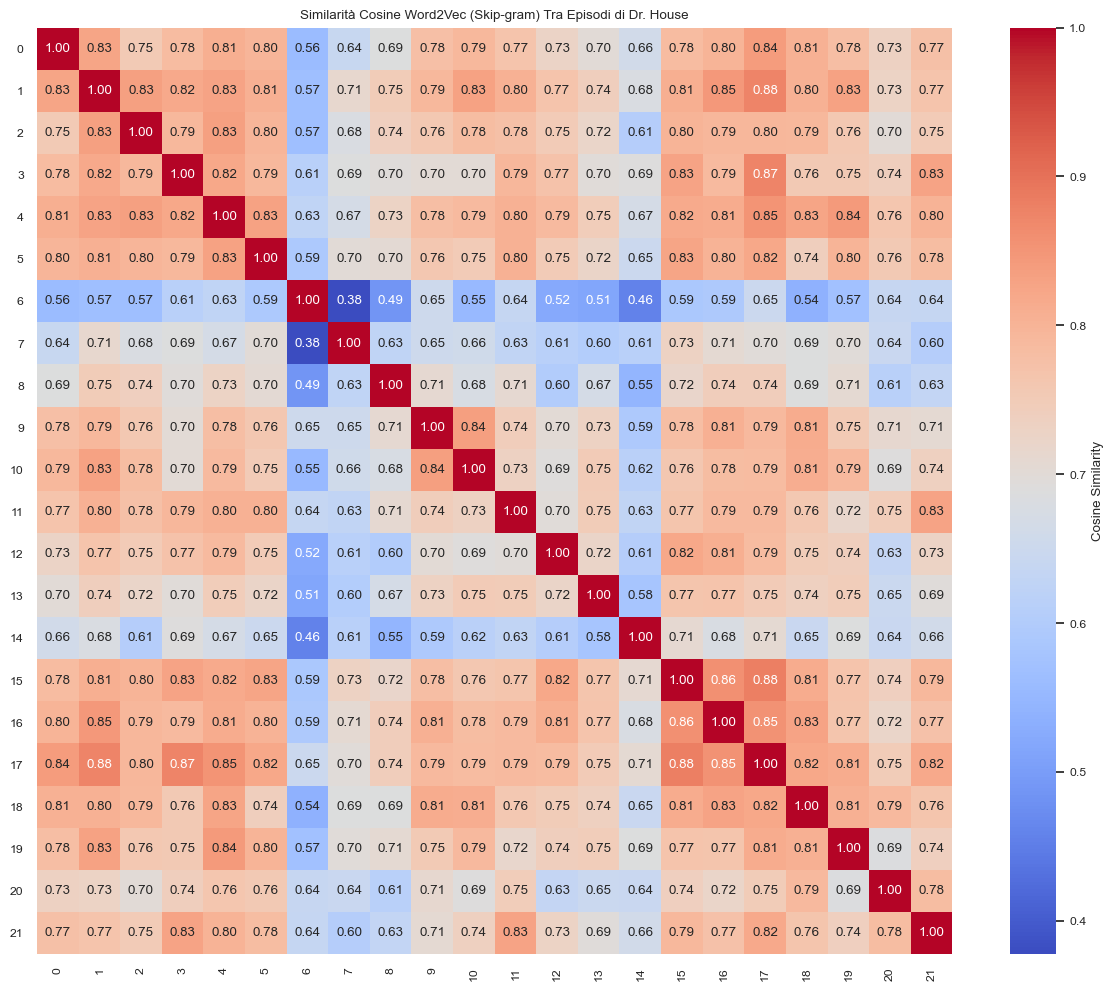

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import word_tokenize

# Assumiamo che 'normalized_plot_text' sia la colonna dei sommari puliti
data = [word_tokenize(text) for text in house_episodes_df['normalized_plot_text']]

# Crea il modello Word2Vec usando Skip-gram
model_sg = gensim.models.Word2Vec(data, vector_size=100, window=5, min_count=1, sg=1)

def average_vector(words, model):
    valid_words = [word for word in words if word in model.wv.key_to_index]
    if valid_words:
        return np.mean([model.wv[word] for word in valid_words], axis=0)
    else:
        return np.zeros(model.vector_size)

# Prepariamo la matrice degli embeddings medi per ogni episodio utilizzando il modello Skip-gram
episode_embeddings_sg = np.array([average_vector(episode, model_sg) for episode in data])

# Calcola la matrice di similarità coseno tra gli embeddings
similarity_matrix_sg = cosine_similarity(episode_embeddings_sg)

# Converti la matrice di similarità in un DataFrame per una migliore visualizzazione
similarity_df_sg = pd.DataFrame(similarity_matrix_sg, index=house_episodes_df.index, columns=house_episodes_df.index)

# Visualizzazione con heatmap per Skip-gram
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)  # Ajusta la dimensione del font

heatmap_sg = sns.heatmap(similarity_df_sg, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
heatmap_sg.set_xticklabels(heatmap_sg.get_xticklabels(), rotation=90)
heatmap_sg.set_yticklabels(heatmap_sg.get_yticklabels(), rotation=0)

plt.title('Similarità Cosine Word2Vec (Skip-gram) Tra Episodi di Dr. House')
plt.tight_layout()
plt.show()


# TF-IDF

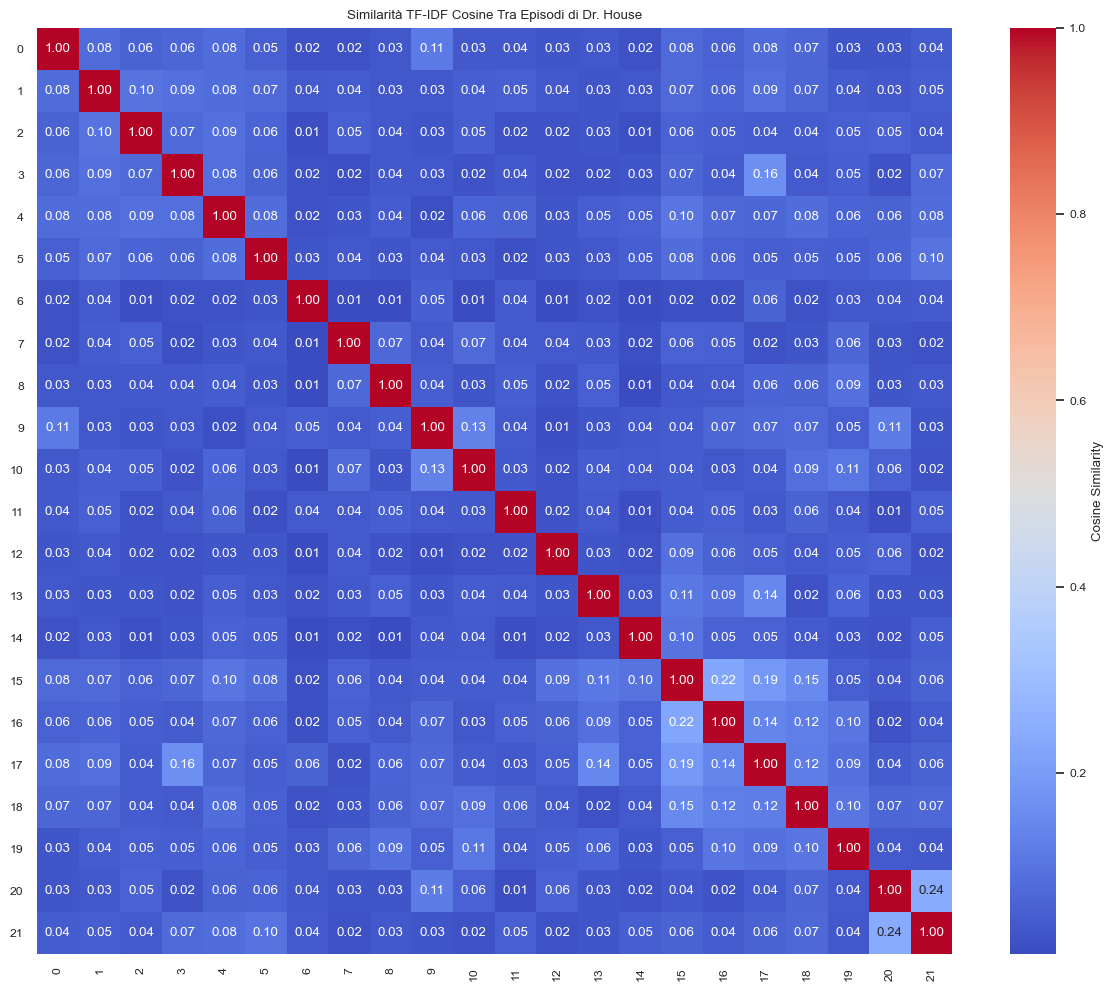

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assumiamo che 'normalized_plot_text' sia la colonna con i sommari puliti
# Crea un'istanza di TfidfVectorizer
# Personalizza i parametri se necessario (es. max_df, min_df)
vectorizer = TfidfVectorizer()

# Applica il vectorizer ai dati puliti per creare la matrice TF-IDF
tfidf_matrix = vectorizer.fit_transform(house_episodes_df['normalized_plot_text'])

# Calcola la matrice di similarità a coseno utilizzando la matrice TF-IDF
similarity_matrix_tfidf = cosine_similarity(tfidf_matrix)

# Converti la matrice di similarità in un DataFrame per una migliore visualizzazione
similarity_df_tfidf = pd.DataFrame(similarity_matrix_tfidf, index=house_episodes_df.index, columns=house_episodes_df.index)

# Configurazione e visualizzazione della heatmap della similarità
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)  # Ajusta la dimensione del font

# Visualizza la heatmap
heatmap = sns.heatmap(similarity_df_tfidf, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title('Similarità TF-IDF Cosine Tra Episodi di Dr. House')
plt.tight_layout()
plt.show()


# Bag of Words

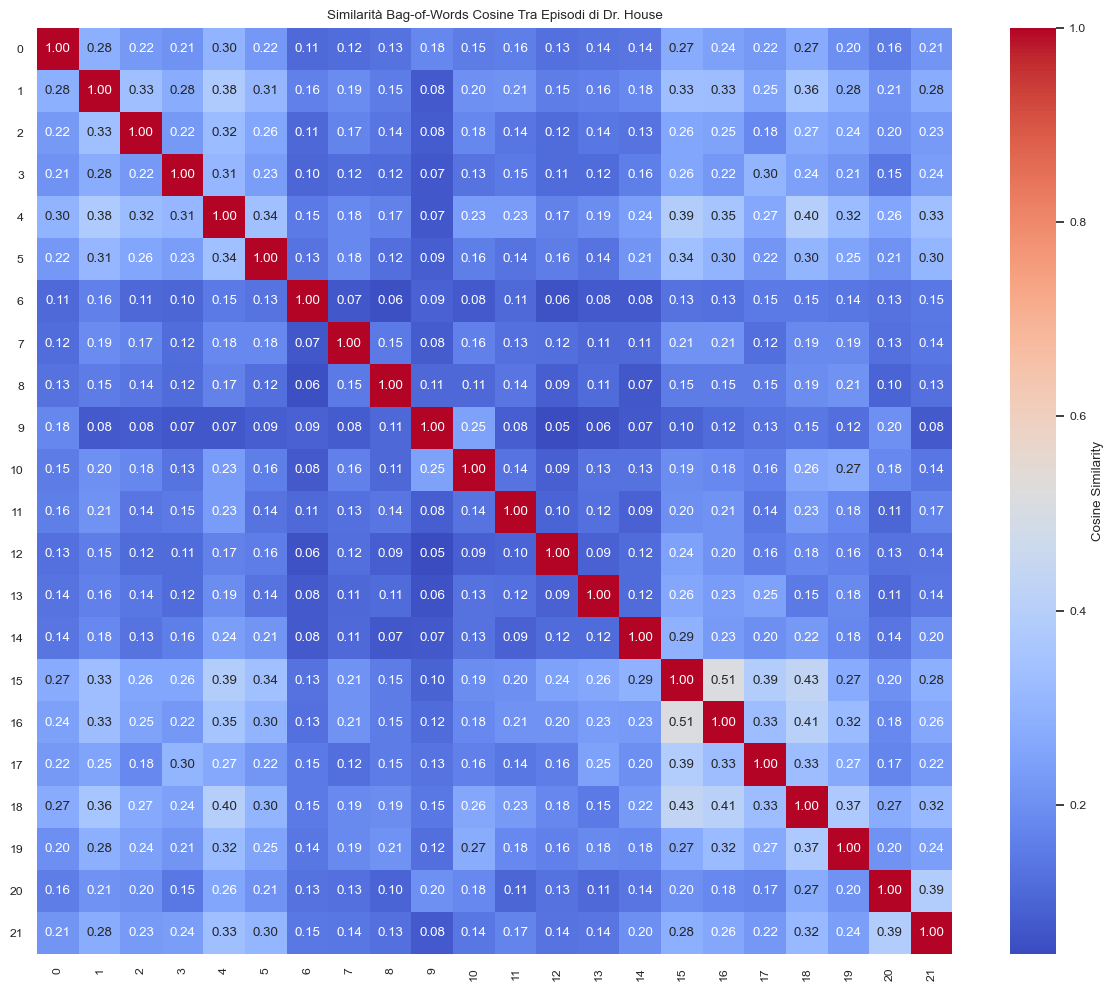

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Crea un'istanza di CountVectorizer, puoi personalizzare i parametri qui
vectorizer = CountVectorizer()

# Supponiamo che 'normalized_plot_text' sia la colonna con i sommari puliti
# Applica il CountVectorizer ai dati per creare la matrice BoW
bow_matrix = vectorizer.fit_transform(house_episodes_df['normalized_plot_text'])

# Calcola la matrice di similarità a coseno utilizzando la matrice BoW
similarity_matrix_bow = cosine_similarity(bow_matrix)

# Converti la matrice di similarità in un DataFrame per una migliore visualizzazione
similarity_df_bow = pd.DataFrame(similarity_matrix_bow, index=house_episodes_df.index, columns=house_episodes_df.index)

# Configurazione e visualizzazione della heatmap della similarità
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)  # Ajusta la dimensione del font
heatmap = sns.heatmap(similarity_df_bow, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Similarità Bag-of-Words Cosine Tra Episodi di Dr. House')
plt.tight_layout()
plt.show()
